In [73]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [74]:
import numpy as np
from scipy import ndimage

In [75]:
images = [
    './focalstack/stack1.png',
    './focalstack/stack2.png',
    './focalstack/stack3.png'
]

data = map(lambda path: ndimage.imread(path), images)

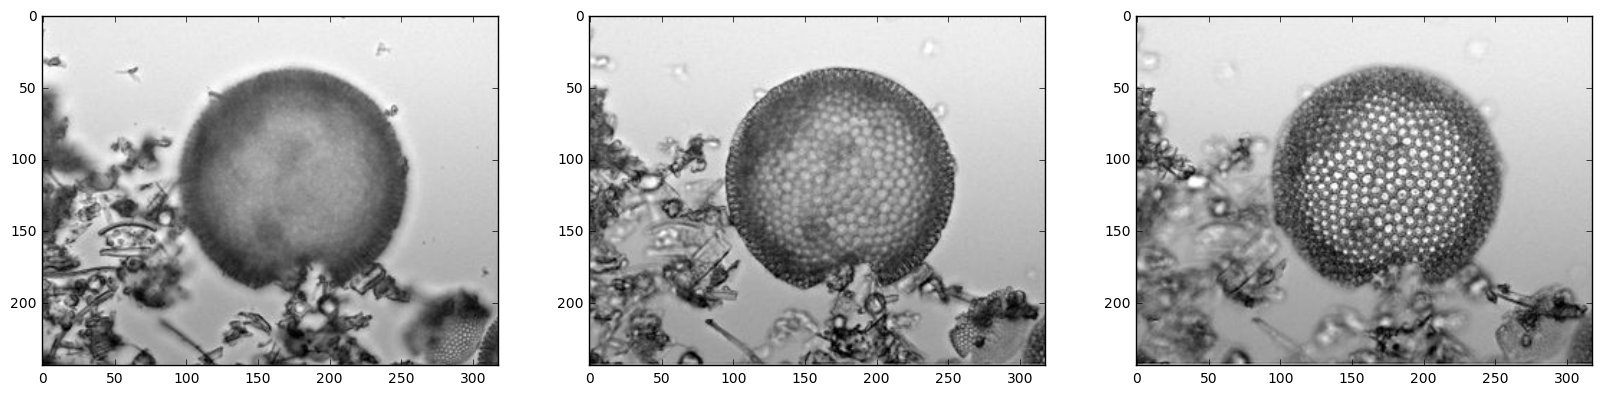

In [76]:
subplot(1, 3, 1)
imshow(data[0], cmap='gray')
subplot(1, 3, 2)
imshow(data[1], cmap='gray')
subplot(1, 3, 3)
imshow(data[2], cmap='gray')

In [77]:
def imageGradient(window):
    deltaLR = abs(window[3] - window[5])
    deltaTD = abs(window[1] - window[7])

    if deltaLR > deltaTD:
        return deltaLR
    elif deltaLR <= deltaTD:
        return deltaTD
    
gradientMaps = map(lambda image: ndimage.filters.generic_filter(image, imageGradient, size=3), data)

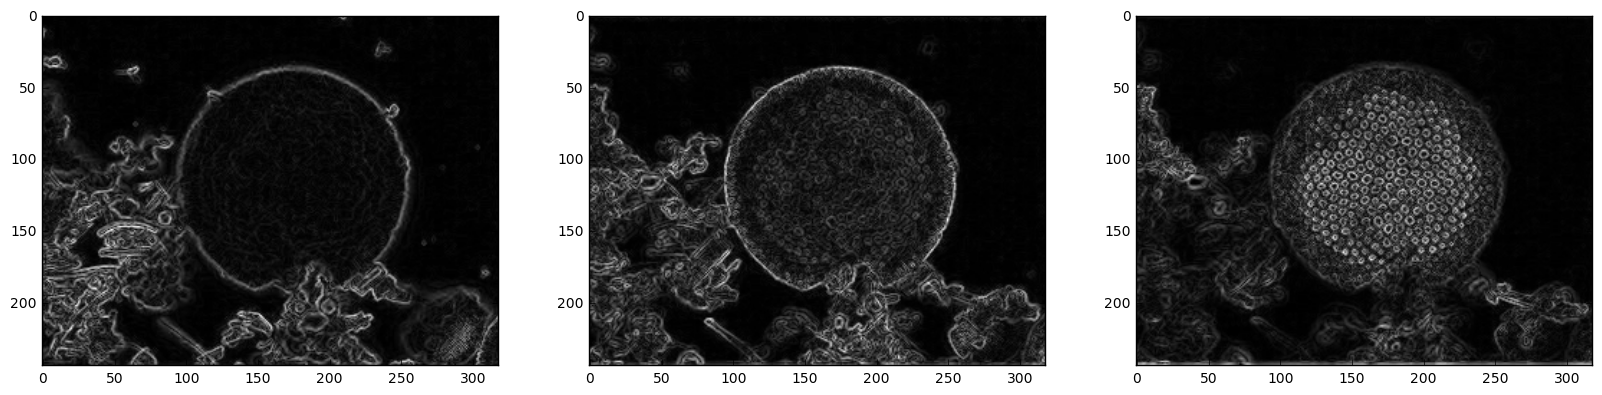

In [78]:
subplot(1, 3, 1)
imshow(gradientMaps[0], cmap='gray')
subplot(1, 3, 2)
imshow(gradientMaps[1], cmap='gray')
subplot(1, 3, 3)
imshow(gradientMaps[2], cmap='gray')

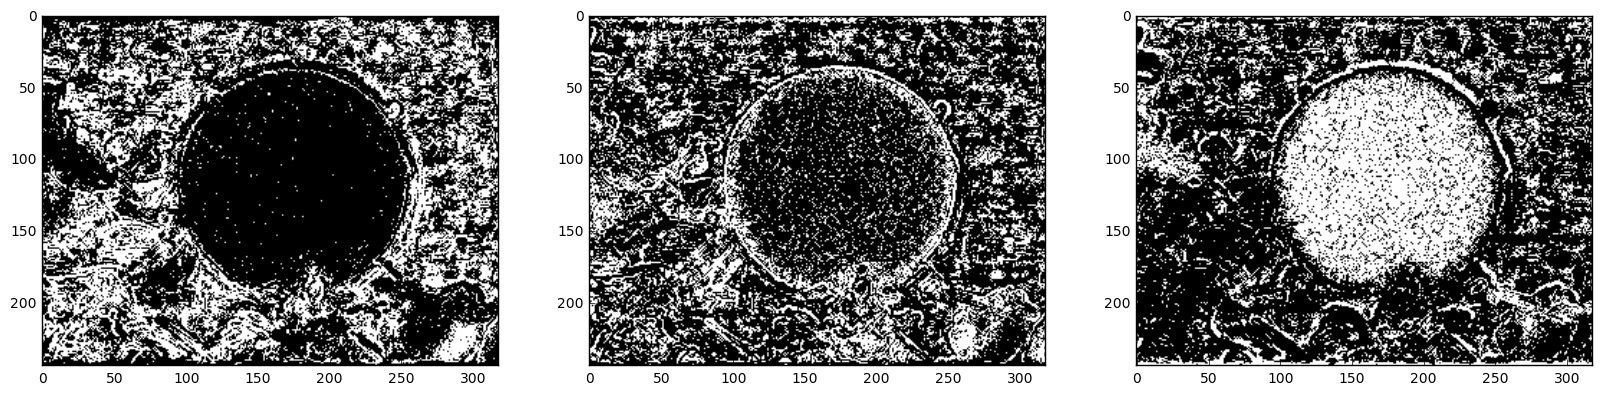

In [79]:
def combineFocalStack(images, gradientMaps):
    gradientMaps = np.array(gradientMaps)
    
    bestPixelsMask = np.argmax(gradientMaps, axis=0)
    maxIndex = np.amax(bestPixelsMask)
    minIndex = np.amin(bestPixelsMask)
    resultImage = np.empty(images[0].shape)
    
    c = 1
    for index in range(minIndex, maxIndex + 1):
        imageContribution = bestPixelsMask == index
        resultImage[imageContribution] = images[index][imageContribution]
        subplot(1, maxIndex - minIndex + 1, c)
        imshow(imageContribution, cmap='gray')
        c += 1
        
    return resultImage
    
combinedImage = combineFocalStack(data, gradientMaps)

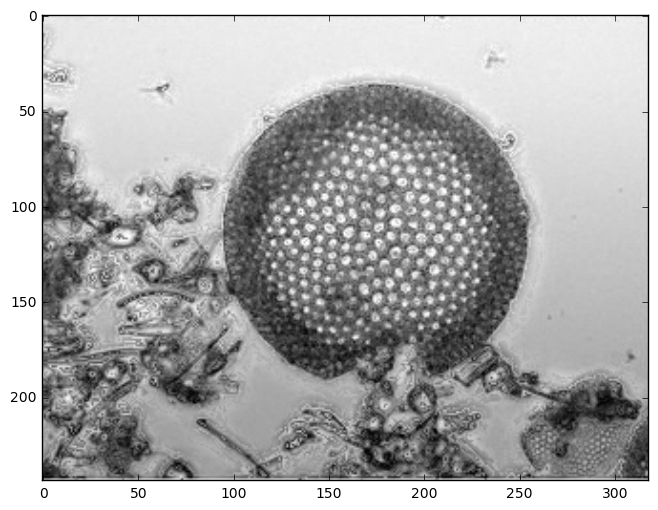

In [80]:
pylab.rcParams['figure.figsize'] = (10, 6)
imshow(combinedImage, cmap='gray')